In [3]:
# Read the data from local folder
import os
import pandas as pd
import utils
import numpy as np

ROOT = os.path.abspath('dataset')

df_trans = pd.read_csv(os.path.join(ROOT, 'JusticIA_DatosTranscripciones.csv'))

df_trans.info()
df_trans['NombreArchivo'][200]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fuente         2959 non-null   object
 1   Conjunto       2959 non-null   object
 2   NombreArchivo  2959 non-null   object
 3   Texto          2000 non-null   object
 4   MetodoTexto    2000 non-null   object
dtypes: object(5)
memory usage: 115.7+ KB


'Ficheros_Detenidos_Desaparecidos_Mendez_Alvarado_Maria_de_Jesus_Mendez_Alvarado_Maria_de_Jesus-20-.JPG'

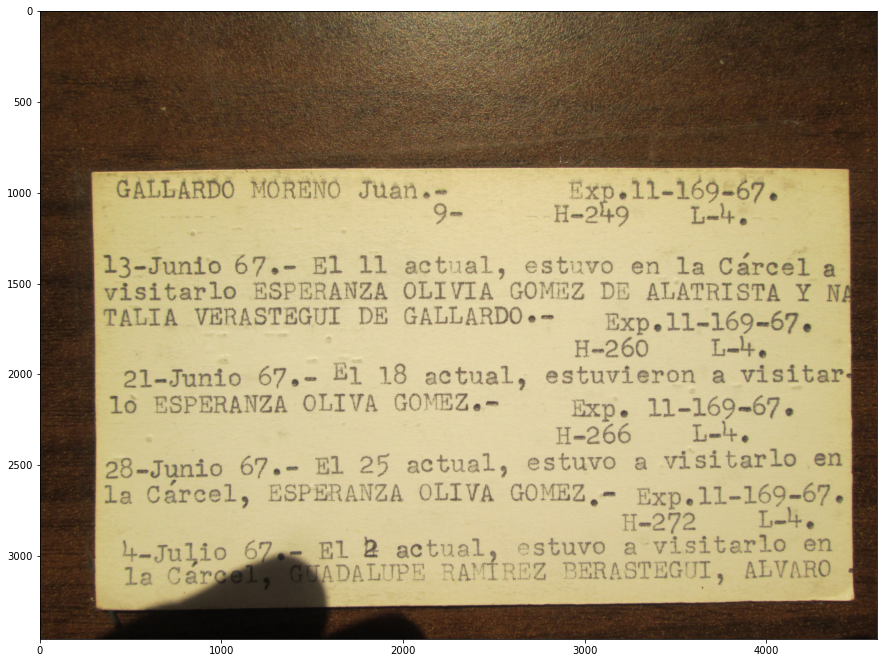

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(utils.open_idx(df_trans, ROOT, 3))
plt.show()

 # Test how a manually cropped image performs in tesseract

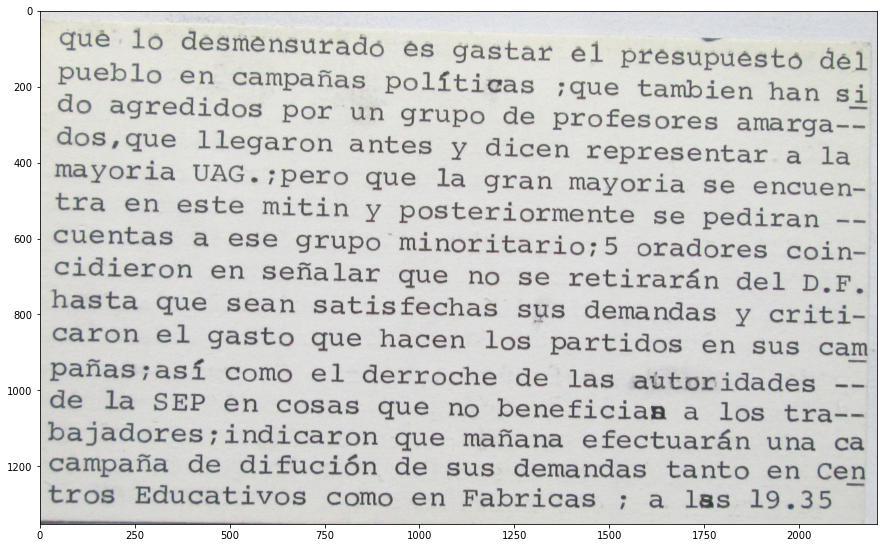

In [79]:
import cv2
img = cv2.imread('dataset/cropped_images/Ficheros_UAG_82-02-17_a_82-03-18_UAG,_fichas-139-.JPG')

h_img, w_img, _ = img.shape

utils.show_bgr_image_in_plt(img)



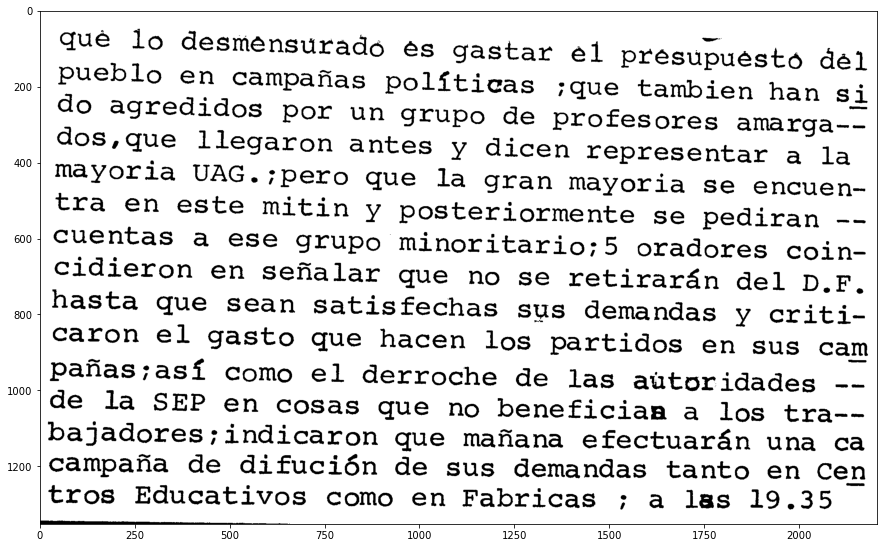

In [80]:
# Apply a simple threshold
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bw = cv2.threshold(img_gray, 160, 255, cv2.THRESH_BINARY)
plt.imshow(img_bw, 'gray')

In [81]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blurred = cv2.medianBlur(img_gray,5)
th2 = cv2.adaptiveThreshold(img_blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

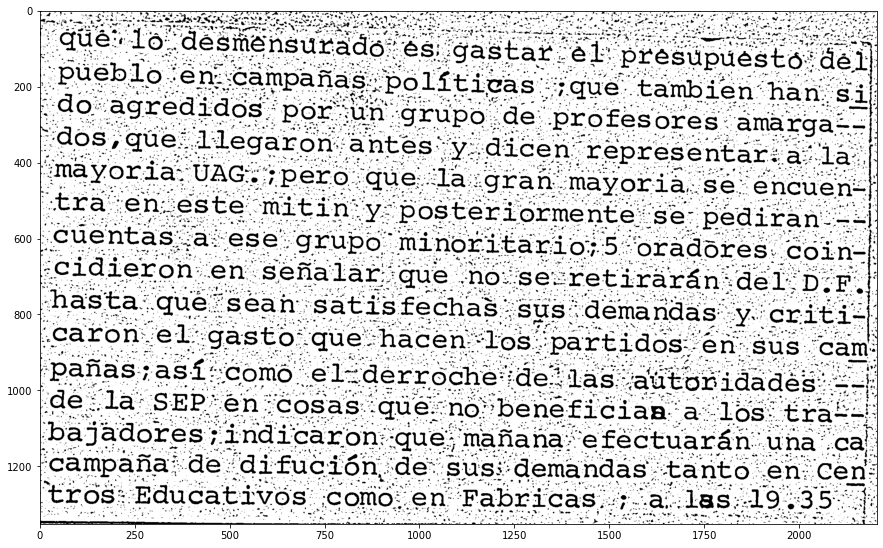

In [82]:
utils.show_bgr_image_in_plt(th2)

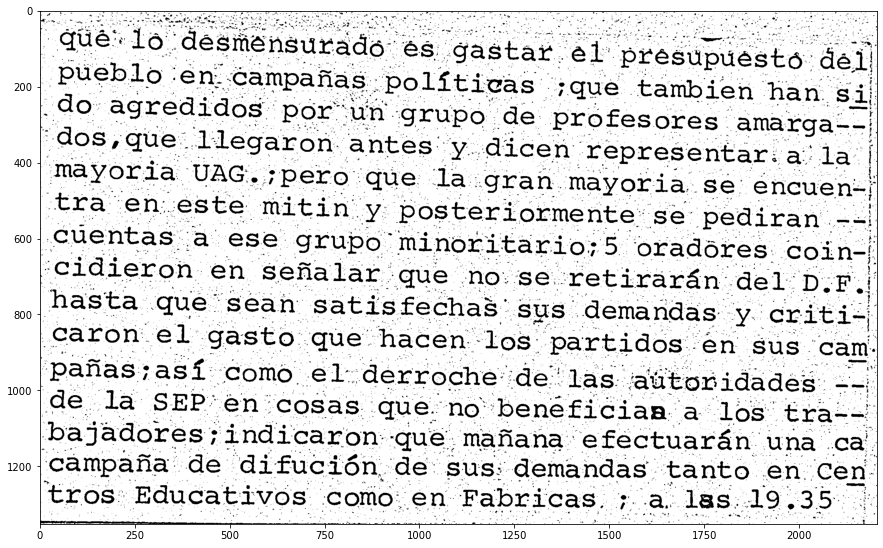

In [83]:
utils.show_bgr_image_in_plt(th3)

In [84]:
_, th2_bw = cv2.threshold(th2, 126, 255, cv2.THRESH_BINARY)
plt.imshow(th2_bw, 'gray')

In [85]:
import pytesseract
custom_config = r'-l spa'
string_gray = pytesseract.image_to_string(img_gray, config=custom_config)
print(string_gray)

que lo desmensurado es gastar el presupuesto del
pueblo en campañas políticas ¿que tambien han si
do agredidos por un grupo de profesores amarga-=-
dos,que llegaron antes y dicen representar a la

mayoria UAG.;pero que la gran mayoria se encuen-
tra en este mitin y posteriormente se pediran --
cuentas a ese grupo minoritario;5 oradores coin-
cidieron en señalar que no se retirarán del D.F.
hasta que sean satisfechas sus demandas y criti-
caron el gasto que hacen los partidos en sus cam
pañas;así como el derroche de las autoridades --
de la SEP en cosas que no benefician a los tra--
bajadores;indicaron que mañana efectuarán una ca
campaña de difución de sus demandas tanto en Cen
tros Educativos como en Fabricas ; a las 19.35



In [86]:
string_orig = pytesseract.image_to_string(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), config=custom_config)
print(string_orig)

que lo desmensurado es gastar el presupuesto del
pueblo en campañas políticas ¡que tambien han si
do agredidos por un grupo de profesores amarga--
dos,que llegaron antes y dicen representar a la

mayoria UAG.;pero que la gran mayoria se encuen-
tra en este mitin y posteriormente se pediran --
cuentas a ese grupo minoritario;5 oradores coin-
cidieron en señalar que ho se retirarán del D.F.
hasta que sean satisfechas sus demandas y criti-
caron el gasto que hacen los partidos en sus cam
pañas;así como el derroche de las autoridades --
de la SEP en cosas que no benefician a los tra--
bajadores;indicaron que mañana efectuarán una ca
campaña de difución de sus demandas tanto en Cen
tros Educativos como en Fabricas ; a las 19.35



In [87]:
string_bw = pytesseract.image_to_string(img_bw, config=custom_config)
print(string_bw)

que lo desmensurado es gastar el presupuesto del
pueblo en campañas políticas ;que tambien han si
do agredidos por un grupo de profesores amarga--
dos,que llegaron antes y dicen representar a la

mayoria UAG.:;pero que la gYan mayoria se encuen-
tra en este mitin y posteriormente se pediran --
cuentas a ese grupo minoritario;5 oradores coin-
cidieron en señalar que no se retirarán del D.F.
hasta que sean satisfechas sus demandas y criti-
caron el gasto que hacen los partidos en sus cam
pañas;así como el derroche de las autoridades --
de la SEP en cosas que no benefician a los tra--
bajadores;indicaron que mañana efectuarán una ca
campaña de difución de sus demandas tanto en Cen
tros Educativos como en Fabricas ; a las 19.35



 # Let's try to detect the edges using hough lines



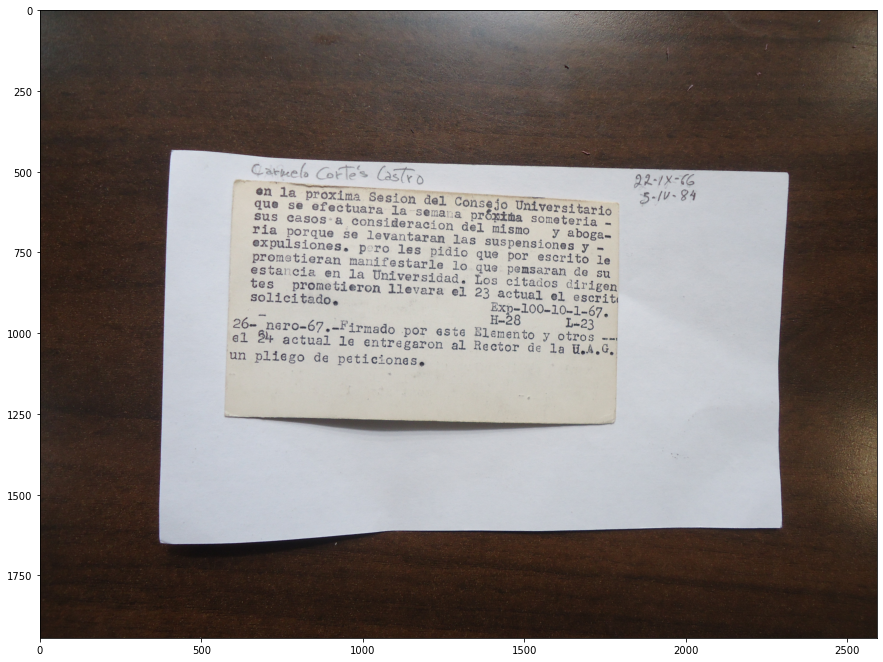

In [88]:
img_nc = np.array(utils.open_idx(df_trans, ROOT, 100))
plt.imshow(img_nc)

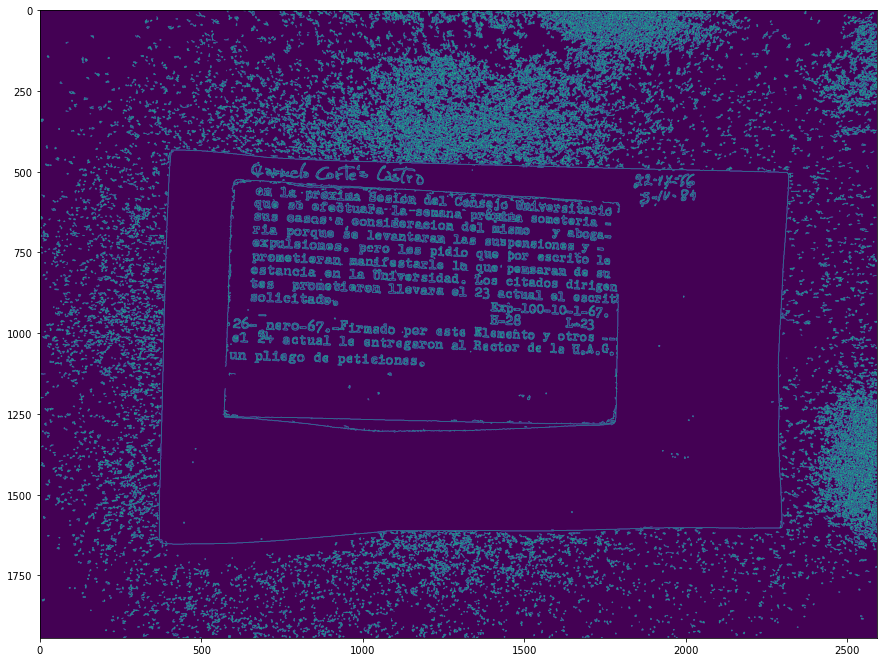

In [89]:
# Convert to grayscale
img_ed_g = cv2.cvtColor(img_nc, cv2.COLOR_RGB2GRAY)
# Perform edge detection
edges = cv2.Canny(img_ed_g, 30, 100)
plt.imshow(edges)

In [90]:
# detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15, np.array([]), 50, 5)

In [91]:
# iterate over the output lines and draw them
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img_nc, (x1, y1), (x2, y2), (20, 220, 20), 3)

plt.imshow(img_nc)

In [100]:
import cv2
import numpy as np

# read image as grayscale
img = np.array(utils.open_idx(df_trans, ROOT, 150))

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]\

# apply morphology
kernel = np.ones((7,7), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((9,9), np.uint8)
morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel)

# get largest contour
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
area_thresh = 0
for c in contours:
    area = cv2.contourArea(c)
    if area > area_thresh:
        area_thresh = area
        big_contour = c


# get bounding box
x,y,w,h = cv2.boundingRect(big_contour)

# draw filled contour on black background
mask = np.zeros_like(gray)
mask = cv2.merge([mask,mask,mask])
cv2.drawContours(mask, [big_contour], -1, (255,255,255), cv2.FILLED)

# apply mask to input
result1 = img.copy()
result1 = cv2.bitwise_and(result1, mask)

# crop result
result2 = result1[y:y+h, x:x+w]

# view result
utils.show_bgr_image_in_plt(thresh)



In [101]:
utils.show_bgr_image_in_plt(morph)



In [102]:
plt.imshow(mask)



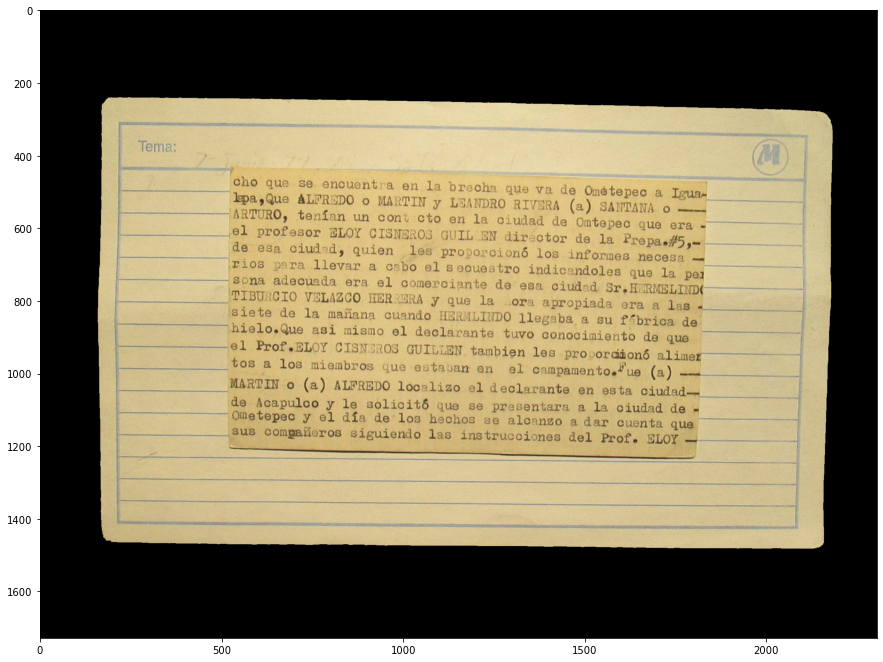

In [103]:

plt.imshow(result1)

In [104]:
plt.imshow(result2)

In [105]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
string_bw = pytesseract.image_to_string(img_gray, config=custom_config)
print(string_bw)

cho que se encuentra en la br ¡Cha que va de Ométepec a Isuas
lkpasQue ALFREDO o MARTIN y LUANDRO RIVERA (a) SANTANA o ——
ARTURO, tenían un cont cto en la ciudad de Omtepec que era -
el profesor ELOY CISNEROS GUIL EN dirsctor de la Propask5 y=
de esa ciudad, quien les proporcionó los informes necesa —
los para llevar a cabo el secuestro indicandoles que la pel
sona adecuada era el comerciante de esa ciudad. Srs HERMELIND(
TIBURCIO VELAZCO HERZBRA Y que la ora apropiada ora a las -
Siete de la mañana cuando HERMLINDO llegaba a su ffíbrica de
hielo»Que asi mismo el declarante tuvo conocimiento de que
el Prof. ELOY CISNIROS GUILLEN tambien les pro»ordionó alimer
tos a los miembros que estaban en el campamento." ue (a)
MARTIN o (a) ALFREDO localizo el declarante en esta ciudad
de Acapulco y le solicité que se presentara a la ciudad de =
Ometepec y el día de los hechos se alcanzo a dar cuenta que
sus compañeros siguiendo las instrucciones del Prof. ELOY —

A A A A A

 

